In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

Are we have info about test customers in preiouses data?

In [2]:
import gc
import sys
sys.path.append('../')

from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)
from IPython.display import HTML, display
from sklearn import metrics
import traceback 

MERED = "merged"
#PATH = "../../../data/home-credit-default-risk/"
PATH = "../../data/home-credit-default-risk/"

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
ls {PATH}

application_test.csv                installments_payments.csv
application_test.csv.zip            installments_payments.csv.zip
application_train.csv               merged/
application_train.csv.zip           models/
bureau_balance.csv                  POS_CASH_balance.csv
bureau_balance.csv.zip              POS_CASH_balance.csv.zip
bureau.csv                          previous_application.csv
bureau.csv.zip                      previous_application.csv.zip
credit_card_balance.csv             sample_submission.csv.zip
credit_card_balance.csv.zip         tmp/
HomeCredit_columns_description.csv


In [3]:
file_names = ['application_train', 'application_test']
tables = [pd.read_csv(f'{PATH}{file_name}.csv',low_memory=False) for file_name in file_names]

In [6]:
for t in tables: display(t.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
for t in tables: display(DataFrameSummary(t).summary())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511,307511,NaN,NaN,NaN,NaN,307511,307511,307511,307499,...,307511,307511,307511,307511,265992,265992,265992,265992,265992,265992
mean,278181,0.0807288,NaN,NaN,NaN,NaN,0.417052,168798,599026,27108.6,...,0.00812979,0.000595101,0.000507299,0.000334947,0.00640245,0.00700021,0.0343619,0.267395,0.265474,1.89997
std,102790,0.272419,NaN,NaN,NaN,NaN,0.722121,237123,402491,14493.7,...,0.0897982,0.0243875,0.0225176,0.0182985,0.0838491,0.110757,0.204685,0.916002,0.794056,1.86929
min,100002,0,NaN,NaN,NaN,NaN,0,25650,45000,1615.5,...,0,0,0,0,0,0,0,0,0,0
25%,189146,0,NaN,NaN,NaN,NaN,0,112500,270000,16524,...,0,0,0,0,0,0,0,0,0,0
50%,278202,0,NaN,NaN,NaN,NaN,0,147150,513531,24903,...,0,0,0,0,0,0,0,0,0,1
75%,367142,0,NaN,NaN,NaN,NaN,1,202500,808650,34596,...,0,0,0,0,0,0,0,0,0,3
max,456255,1,NaN,NaN,NaN,NaN,19,1.17e+08,4.05e+06,258026,...,1,1,1,1,4,9,8,27,261,25
counts,307511,307511,307511,307511,307511,307511,307511,307511,307511,307499,...,307511,307511,307511,307511,265992,265992,265992,265992,265992,265992
uniques,307511,2,2,3,2,2,15,2548,5603,13672,...,2,2,2,2,5,9,9,24,11,25


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744,NaN,NaN,NaN,NaN,48744,48744,48744,48720,48744,...,48744,48744,48744,48744,42695,42695,42695,42695,42695,42695
mean,277797,NaN,NaN,NaN,NaN,0.397054,178432,516740,29426.2,462619,...,0.00155917,0,0,0,0.00210798,0.00180349,0.00278721,0.00929851,0.546902,1.98377
std,103170,NaN,NaN,NaN,NaN,0.709047,101523,365397,16016.4,336710,...,0.0394559,0,0,0,0.0463727,0.0461324,0.0540374,0.110924,0.693305,1.83887
min,100001,NaN,NaN,NaN,NaN,0,26941.5,45000,2295,45000,...,0,0,0,0,0,0,0,0,0,0
25%,188558,NaN,NaN,NaN,NaN,0,112500,260640,17973,225000,...,0,0,0,0,0,0,0,0,0,0
50%,277549,NaN,NaN,NaN,NaN,0,157500,450000,26199,396000,...,0,0,0,0,0,0,0,0,0,2
75%,367556,NaN,NaN,NaN,NaN,1,225000,675000,37390.5,630000,...,0,0,0,0,0,0,0,0,1,3
max,456250,NaN,NaN,NaN,NaN,20,4.41e+06,2.2455e+06,180576,2.2455e+06,...,1,0,0,0,2,2,2,6,7,17
counts,48744,48744,48744,48744,48744,48744,48744,48744,48720,48744,...,48744,48744,48744,48744,42695,42695,42695,42695,42695,42695
uniques,48744,2,2,2,2,11,606,2937,7491,677,...,2,1,1,1,3,3,3,7,8,16


In [4]:
train, test = tables

In [7]:
len(train), len(test)

(307511, 48744)

In [5]:
cat_vars = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
           'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
           'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
           'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 
           'OCCUPATION_TYPE','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
           'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 
           'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
           'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE', 
            'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 
            'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
            'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
            'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 
            'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
            'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_YEAR']

contin_vars = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
              'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'APARTMENTS_AVG', 'COMMONAREA_AVG', 'YEARS_BEGINEXPLUATATION_MODE',
               'APARTMENTS_MODE', 'COMMONAREA_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'APARTMENTS_MEDI', 'COMMONAREA_MEDI',
               'TOTALAREA_MODE']

index = 'SK_ID_CURR'
dep = 'TARGET'

In [6]:
joined = train[cat_vars+contin_vars+[dep, index]].copy()

In [7]:
test[dep] = 0
joined_test = test[cat_vars+contin_vars+[dep, index]].copy()

In [8]:
for v in cat_vars: joined[v] = joined[v].astype('category').cat.as_ordered()

In [9]:
for v in cat_vars: joined_test[v] = joined_test[v].astype('category').cat.as_ordered()

In [10]:
joined['TARGET'] = joined['TARGET'].astype('category')
joined_test['TARGET'] = joined_test['TARGET'].astype('category')

In [11]:
for v in contin_vars:
    joined[v] = joined[v].fillna(0).astype('float32')
    joined_test[v] = joined_test[v].fillna(0).astype('float32')

In [12]:
joined = joined.set_index("SK_ID_CURR")

In [13]:
joined_test = joined_test.set_index("SK_ID_CURR")

In [14]:
apply_cats(test, joined)

In [16]:
#idxs = get_cv_idxs(n, val_pct=150000/n)
#joined_samp = joined.iloc[idxs].set_index("SK_ID_CURR")
#samp_size = len(joined_samp); samp_size

In [17]:
joined.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,APARTMENTS_AVG,COMMONAREA_AVG,YEARS_BEGINEXPLUATATION_MODE,APARTMENTS_MODE,COMMONAREA_MODE,YEARS_BEGINEXPLUATATION_MEDI,APARTMENTS_MEDI,COMMONAREA_MEDI,TOTALAREA_MODE,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,...,0.0247,0.0143,0.9722,0.0252,0.0144,0.9722,0.0250,0.0144,0.0149,1
100003,Cash loans,F,N,N,0,Family,State servant,Higher education,Married,House / apartment,...,0.0959,0.0605,0.9851,0.0924,0.0497,0.9851,0.0968,0.0608,0.0714,0
100004,Revolving loans,M,Y,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
100006,Cash loans,F,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
100007,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0


In [18]:
joined_test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,APARTMENTS_AVG,COMMONAREA_AVG,YEARS_BEGINEXPLUATATION_MODE,APARTMENTS_MODE,COMMONAREA_MODE,YEARS_BEGINEXPLUATATION_MEDI,APARTMENTS_MEDI,COMMONAREA_MEDI,TOTALAREA_MODE,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,Cash loans,F,N,Y,0,Unaccompanied,Working,Higher education,Married,House / apartment,...,0.0660,0.0000,0.9732,0.0672,0.0000,0.9732,0.0666,0.0000,0.0392,0
100005,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
100013,Cash loans,M,Y,Y,0,NaN,Working,Higher education,Married,House / apartment,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
100028,Cash loans,F,N,Y,2,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,0.3052,0.1165,0.9970,0.3109,0.1176,0.9970,0.3081,0.1173,0.3700,0
100038,Cash loans,M,Y,N,1,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0


In [16]:
samp_size = len(joined); samp_size

307511

In [17]:
df, y, nas, mapper = proc_df(joined, dep, do_scale=True)
#yl = np.log(y)
yl = y

In [23]:
yl

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0], dtype=int8)

In [18]:
df_test, _, nas, mapper = proc_df(joined_test, dep, do_scale=True,
                                  mapper=mapper, na_dict=nas)

In [19]:
#train_ratio = 0.75
train_ratio = 0.9
train_size = int(samp_size * train_ratio); train_size
val_idx = list(range(train_size, len(df)))

len(val_idx)

30752

In [20]:
#def inv_y(a): return np.exp(a)

def auc(inp,targ):
    return metrics.roc_auc_score(to_np(targ),to_np(np.exp(inp[:,1])))

#max_log_y = np.max(yl)
#y_range = (0, max_log_y*1.2)

In [21]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl.astype(int), cat_flds=cat_vars, bs=128,
                                       test_df=df_test, is_reg=False, is_multi=False)

In [24]:
#?ColumnarModelData.from_data_frame

In [23]:
cat_sz = [(c, len(joined[c].cat.categories)+1) for c in cat_vars]
len(cat_sz)

61

In [24]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]
len(emb_szs)

61

In [73]:
len(contin_vars)

17

In [31]:
len(df.columns)-len(cat_vars)

17

In [32]:
#http://forums.fast.ai/t/structured-learner/8224/88

In [25]:
m = md.get_learner(emb_szs=emb_szs, n_cont=len(df.columns)-len(cat_vars),
                   emb_drop=0.04, out_sz=2, szs=[100,50], drops=[0.001,0.01], y_range=None, use_bn=False)
#m.summary()

In [34]:
m.summary()

OrderedDict([('Embedding-1',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 2]),
                           ('trainable', True),
                           ('nb_params', 6)])),
             ('Embedding-2',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 2]),
                           ('trainable', True),
                           ('nb_params', 8)])),
             ('Embedding-3',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 2]),
                           ('trainable', True),
                           ('nb_params', 6)])),
             ('Embedding-4',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 2]),
                           ('trainable', True),
                           ('nb_params', 6)])),
             ('Embedding-5',
              OrderedDict([('input_shape', [-1]),
     

In [34]:
m.crit

<function torch.nn.functional.nll_loss(input, target, weight=None, size_average=True, ignore_index=-100, reduce=True)>

In [35]:
lr = 1e-4

In [32]:
m.lr_find()

 57%|█████▋    | 1030/1802 [00:34<00:25, 30.27it/s, loss=0.425]

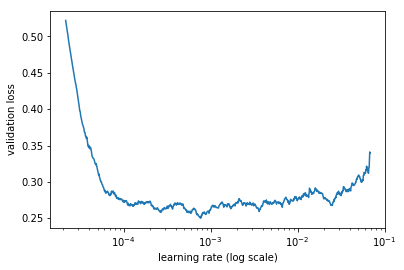

In [138]:
m.sched.plot(100)

In [27]:
lr=1e-4

In [ ]:
m.fit(lr, 3, metrics=[auc])

 25%|██▍       | 531/2163 [00:08<00:26, 61.14it/s, loss=0.266]

In [79]:
m.fit(lr, 5, cycle_len=1, metrics=[auc])

epoch      trn_loss   val_loss   auc                           
    0      0.190761   0.346932   0.621404  
    1      0.175056   0.358541   0.616039                      
    2      0.168972   0.372061   0.614758                      
    3      0.155465   0.386524   0.610094                      
    4      0.149478   0.407903   0.609366                      



[array([0.4079]), 0.6093664700367692]

In [80]:
m.fit(lr, 3, cycle_len=4, cycle_mult=2, metrics=[auc])

epoch      trn_loss   val_loss   auc                           
    0      0.153426   0.407739   0.611644  
    1      0.129907   0.464692   0.603726                      
    2      0.097643   0.522613   0.599742                       
    3      0.08413    0.536676   0.598638                       
    4      0.108209   0.548029   0.603722                       
    5      0.075782   0.659035   0.598403                       
    6      0.053145   0.775016   0.594444                       
    7      0.032537   0.898668   0.593588                       
    8      0.024076   0.986764   0.592673                       
    9      0.016148   1.047032   0.593667                       
    10     0.012881   1.071586   0.591682                       
    11     0.012958   1.077259   0.592009                       
    12     0.028043   1.17629    0.594685                       
    13     0.015965   1.34506    0.592043                        
    14     0.006648   1.487354   0.595504      

[array([2.16626]), 0.5945672284539406]

In [81]:
m.save('home_credit')

In [82]:
m.load('home_credit')

In [83]:
#x,y=m.predict_with_targs()
#try:    
y = m.predict(True)
#except:
#    extype, value, tb = sys.exc_info()
#    traceback.print_exc()
#    pdb.post_mortem(tb)

In [84]:
y

array([[ -0.     , -21.67485],
       [ -0.     , -28.44599],
       [  0.     , -39.28905],
       [ -0.00005,  -9.99863],
       [ -0.01099,  -4.51619],
       [ -9.96584,  -0.00005],
       [  0.     , -68.93047],
       [  0.     , -56.3239 ],
       [ -0.     , -16.10652],
       [ -0.07509,  -2.62644],
       [ -0.     , -33.90205],
       [ -0.     , -14.70196],
       [ -0.     , -31.72699],
       [ -0.     , -19.49968],
       [ -0.     , -33.46239],
       [ -0.     , -28.16018],
       [  0.     , -87.80878],
       [ -0.     , -30.95196],
       [ -0.00004, -10.03171],
       [  0.     , -54.63806],
       ...,
       [ -0.     , -20.22789],
       [ -0.     , -32.946  ],
       [ -0.     , -18.22266],
       [  0.     , -38.99992],
       [  0.     , -35.56463],
       [ -9.46462,  -0.00008],
       [  0.     , -50.48526],
       [  0.     , -38.1759 ],
       [ -0.00152,  -6.49182],
       [ -0.     , -21.35117],
       [ -0.27835,  -1.41482],
       [-22.4379 ,  -0.    

In [85]:
np.exp(y)

array([[1.     , 0.     ],
       [1.     , 0.     ],
       [1.     , 0.     ],
       [0.99995, 0.00005],
       [0.98907, 0.01093],
       [0.00005, 0.99995],
       [1.     , 0.     ],
       [1.     , 0.     ],
       [1.     , 0.     ],
       [0.92766, 0.07234],
       [1.     , 0.     ],
       [1.     , 0.     ],
       [1.     , 0.     ],
       [1.     , 0.     ],
       [1.     , 0.     ],
       [1.     , 0.     ],
       [1.     , 0.     ],
       [1.     , 0.     ],
       [0.99996, 0.00004],
       [1.     , 0.     ],
       ...,
       [1.     , 0.     ],
       [1.     , 0.     ],
       [1.     , 0.     ],
       [1.     , 0.     ],
       [1.     , 0.     ],
       [0.00008, 0.99992],
       [1.     , 0.     ],
       [1.     , 0.     ],
       [0.99848, 0.00152],
       [1.     , 0.     ],
       [0.75703, 0.24297],
       [0.     , 1.     ],
       [1.     , 0.     ],
       [1.     , 0.     ],
       [1.     , 0.     ],
       [1.     , 0.     ],
       [1.     ,

In [88]:
logpreds_valid = m.predict(is_test = False)
preds_valid = np.exp(logpreds_valid[:,1])
preds_binary = (preds_valid >= 0.5).astype(np.int)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds_binary)
plot_confusion_matrix(cm, [0, 1])

ValueError: Found input variables with inconsistent numbers of samples: [48744, 30752]

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y,
                            preds_binary,
                            target_names= ['0', '1']))

ValueError: Mix type of y not allowed, got types {'binary', 'continuous-multioutput'}

In [94]:
df_test_no_index = df_test.reset_index()

In [95]:
preds = np.exp(y[:,1])
submission = pd.DataFrame({'SK_ID_CURR': df_test_no_index['SK_ID_CURR'],
              'TARGET': preds})
submission.to_csv('submission.csv', index=False, float_format='%.8f')

- TODO: Prediction must be in prob
- TODO: Need use COR as metrix

In [96]:
ls

Home Credit Default Risk.ipynb             README.md
Home Credit Default Risk (only app).ipynb  submission.csv
Plant Seedling clf.ipynb


In [97]:
FileLink('submission.csv')

/home/paperspace/fastai/fastai_learn/submission.csv